This notebook is an initial exploration of the data, including data cleaning, visualization, and the production of initial conclusions.

This step is crucial to establish a solid foundation for subsequent projects.

## Step 1 : Load Data

Import libraries

In [21]:
import os
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import string
from textblob import TextBlob
from google.colab import drive
import pandas as pd
import re


# Data Viz Biblio

import matplotlib.pyplot as plt
import seaborn as sns



Connecting to my drive

In [22]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [23]:
# Path to the folder containing Excel files

path= "/content/gdrive/MyDrive/Colab Notebooks/Data/Traduction avis clients/Traduction avis clients"

#### Load all Excel files into a single DataFrame


In [24]:
all_dataframes = []

for file_name in os.listdir(path):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(path, file_name)
        df = pd.read_excel(file_path)
        all_dataframes.append(df)

# Combine all dataframes
consolidated_df = pd.concat(all_dataframes, ignore_index=True)


#### Now we will use a sample of Data ( 100 rows )

In [25]:
path_avis_1_traduit= "/content/gdrive/MyDrive/Colab Notebooks/Data/Traduction avis clients/Traduction avis clients/avis_1_traduit.xlsx"

In [26]:
consolidated_df = pd.read_excel(path_avis_1_traduit)
consolidated_df = consolidated_df.head(100) # Take only 100 rows

## Step 2 : Data exploration

In [27]:
consolidated_df

,note,auteur,avis,assureur,produit,type,date_publication,date_exp,avis_en,avis_cor,avis_cor_en
0,5,brahim--k-131532,"Meilleurs assurances, prix, solutions, écoute,...",Direct Assurance,auto,train,06/09/2021,01/09/2021,"Best insurance, prices, solutions, attentivene...",NaN,NaN
1,4,bernard-g-112497,"je suis globalement satisfait , sauf que vous ...",Direct Assurance,auto,train,03/05/2021,01/05/2021,"I am generally satisfied, except that you have...",NaN,NaN
2,5,virginie-t-107352,Prix tres abordable plusieurs options s'offren...,Direct Assurance,auto,train,21/03/2021,01/03/2021,Very affordable price several options are avai...,NaN,NaN
3,4,boulain-f-116580,"je satisfait du service, une réponse très rapi...",L'olivier Assurance,auto,train,10/06/2021,01/06/2021,"I am satisfied with the service, a very quick ...",NaN,NaN
4,1,ouaille31-51798,"Client depuis plus de 25 ans, très déçu de cet...",Matmut,auto,train,29/01/2017,01/01/2017,"Customer for over 25 years, very disappointed ...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
95,1,samra-91894,"Au vu des commentaires que j'ai pu lire, j'esp...",L'olivier Assurance,auto,train,09/07/2020,01/07/2020,"In view of the comments that I have read, I ve...",NaN,NaN
96,2,fr3-96491,"Attention, la perte ou le vol de clés n'est pa...",Direct Assurance,auto,train,20/08/2020,01/08/2020,"Please note, the loss or theft of keys is not ...",NaN,NaN
97,5,do-carmo-duarte-d-108285,Je suis très satisfait du service de l'olivier...,L'olivier Assurance,auto,train,27/03/2021,01/03/2021,I am very satisfied with the Olivier Assurance...,NaN,NaN
98,5,dave116-90948,Cela va faire bientôt 2 ans que je suis chez d...,Direct Assurance,auto,train,15/06/2020,01/06/2020,I have been with Direct Assurance for almost 2...,NaN,NaN


In [28]:
consolidated_df.shape

(100, 11)

In [29]:
consolidated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   note              100 non-null    int64  
 1   auteur            100 non-null    object 
 2   avis              100 non-null    object 
 3   assureur          100 non-null    object 
 4   produit           100 non-null    object 
 5   type              100 non-null    object 
 6   date_publication  100 non-null    object 
 7   date_exp          100 non-null    object 
 8   avis_en           100 non-null    object 
 9   avis_cor          0 non-null      float64
 10  avis_cor_en       0 non-null      float64
dtypes: float64(2), int64(1), object(8)
memory usage: 8.7+ KB


#### Checking for missing values

In [30]:
missing_values = consolidated_df.isna().sum()
print(missing_values)


note                  0
auteur                0
avis                  0
assureur              0
produit               0
type                  0
date_publication      0
date_exp              0
avis_en               0
avis_cor            100
avis_cor_en         100
dtype: int64


In [31]:
# Percentage of missing values in each column
missing_percentage = (consolidated_df.isnull().sum() / len(consolidated_df)) * 100
missing_percentage

,0
note,0.0
auteur,0.0
avis,0.0
assureur,0.0
produit,0.0
type,0.0
date_publication,0.0
date_exp,0.0
avis_en,0.0
avis_cor,100.0


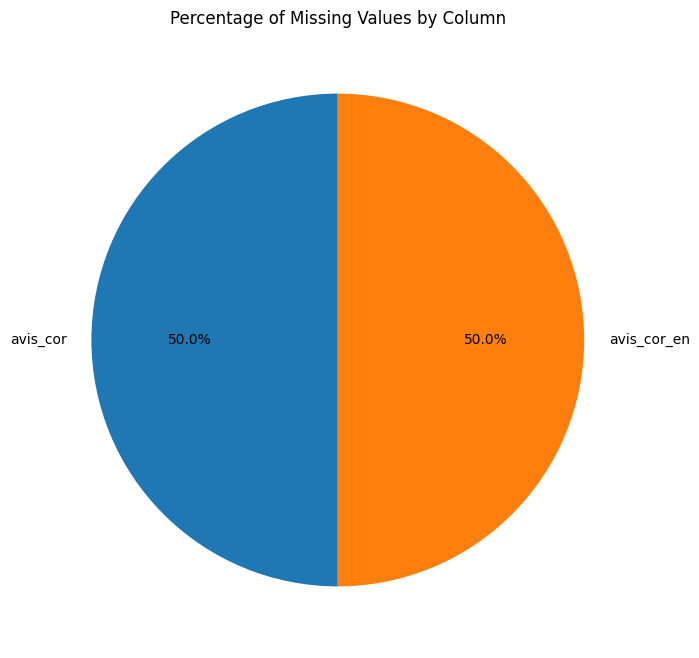

In [32]:
# Filter out columns with 0% missing values for better visualization
missing_percentage = missing_percentage[missing_percentage > 0.01]

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(missing_percentage, labels=missing_percentage.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Missing Values by Column')
plt.show()

## Step 3 : Data Visualization

We should seperate Train Data from test Data

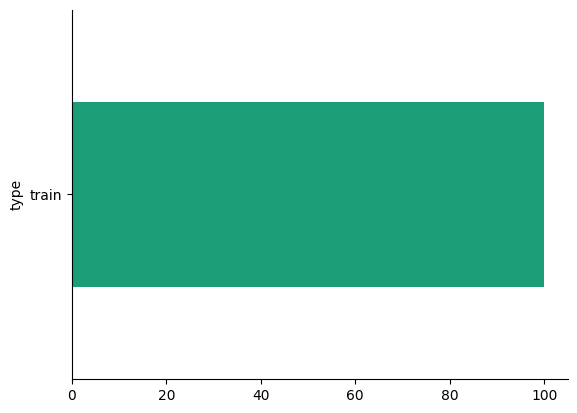

In [33]:
consolidated_df.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#### Distribution of Customer Ratings

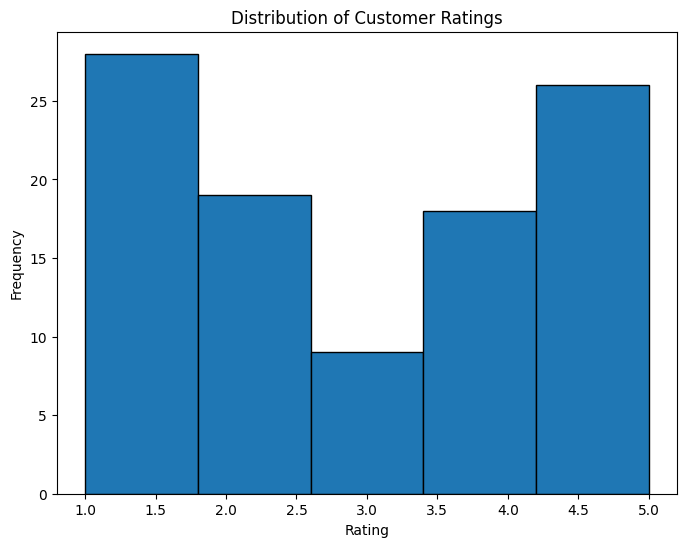

In [34]:
plt.figure(figsize=(8, 6))
plt.hist(consolidated_df['note'], bins=5, edgecolor='black')
plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating')
_ = plt.ylabel('Frequency')

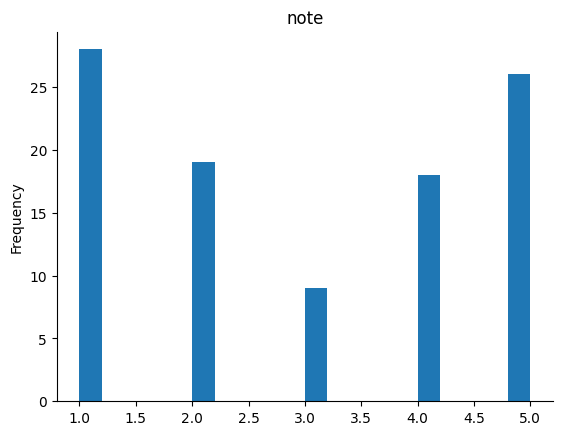

In [35]:
consolidated_df['note'].plot(kind='hist', bins=20, title='note')
plt.gca().spines[['top', 'right',]].set_visible(False)

#### Distribution of Customer Ratings by Produit

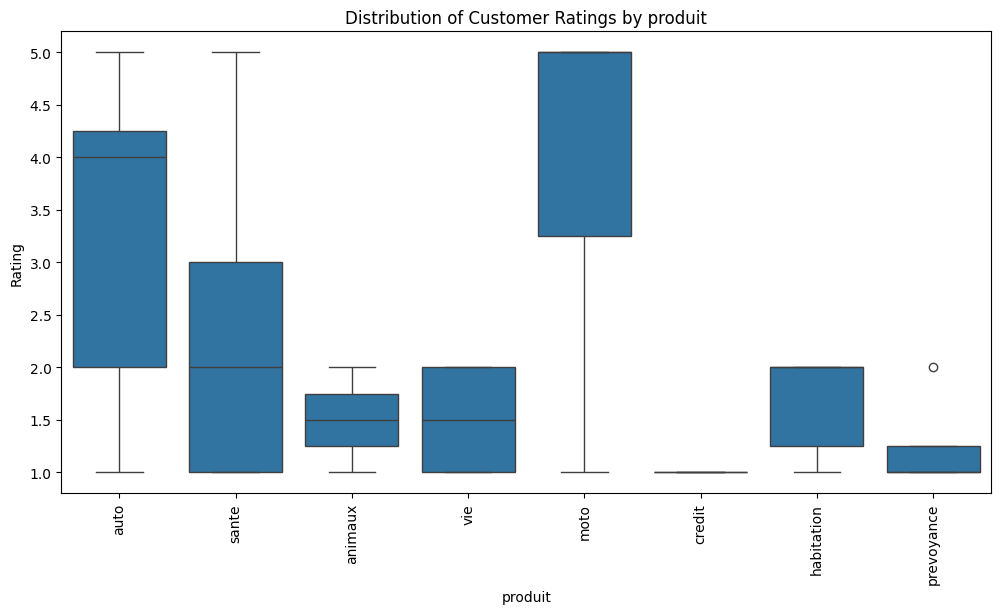

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='produit', y='note', data=consolidated_df)
plt.title('Distribution of Customer Ratings by produit')
plt.xlabel('produit')
plt.ylabel('Rating')
_ = plt.xticks(rotation=90)

## Step 4 : Data cleaning

### Handle missing values

In [77]:
def clean_review_data(df):
    """
    Clean and prepare review data for prediction tasks

    Parameters:
    df (pandas.DataFrame): Input dataframe containing review data

    Returns:
    pandas.DataFrame: Cleaned dataframe ready for NLP tasks
    """

    # Create a copy to avoid modifying the original
    cleaned_df = df.copy()

    # Handle missing values

    # Drop rows where 'note' is missing

    cleaned_df = cleaned_df.dropna(subset=['note'])

    # For text columns avis_en i suugest that we transalte the missing rows from the column avis which is in french

    # Drop rows where 'avis_en' is missing
    cleaned_df = cleaned_df.dropna(subset=['avis_en'])

    # Drop missing values for auteur
    cleaned_df = cleaned_df.dropna(subset=['auteur'])

    # Drop columns with too many missing values
    # These columns have >98% missing values and might not be useful

    columns_to_drop = ['avis_cor', 'avis_cor_en']
    cleaned_df = cleaned_df.drop(columns=columns_to_drop)

    # Text cleaning for reviews

    def clean_text(text):
        text = text.lower()  # Convert to lowercase
        text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
        text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces


        return text

    cleaned_df['avis'] = cleaned_df['avis'].apply(clean_text)
    cleaned_df['avis_en'] = cleaned_df['avis_en'].apply(clean_text)

    # Convert dates to datetime

    cleaned_df['date_publication'] = pd.to_datetime(cleaned_df['date_publication'], format='%d/%m/%Y')
    cleaned_df['date_exp'] = pd.to_datetime(cleaned_df['date_exp'], format='%d/%m/%Y')


    # Create features for prediction
    # Add review length
    cleaned_df['review_length'] = cleaned_df['avis'].str.len()

    # Ensure note is float
    cleaned_df['note'] = cleaned_df['note'].astype(float)

    # # Fill missing 'avis_en' by translating 'avis' if feasible

    def translate_review(review):
        try:
            return str(TextBlob(review).translate(to='en'))
        except Exception:
            return None

    cleaned_df['avis_en'] = cleaned_df['avis_en'].fillna(cleaned_df['avis'].apply(translate_review))

    return cleaned_df

In [42]:
cleaned_df = clean_review_data(consolidated_df)

In [43]:
cleaned_df

,note,auteur,avis,assureur,produit,type,date_publication,date_exp,avis_en,review_length
0,5.0,brahim--k-131532,meilleurs assurances prix solutions écoute rap...,Direct Assurance,auto,train,2021-09-06,2021-09-01,best insurance prices solutions attentiveness ...,150
1,4.0,bernard-g-112497,je suis globalement satisfait sauf que vous a...,Direct Assurance,auto,train,2021-05-03,2021-05-01,i am generally satisfied except that you have ...,263
2,5.0,virginie-t-107352,prix tres abordable plusieurs options soffrent...,Direct Assurance,auto,train,2021-03-21,2021-03-01,very affordable price several options are avai...,164
3,4.0,boulain-f-116580,je satisfait du service une réponse très rapid...,L'olivier Assurance,auto,train,2021-06-10,2021-06-01,i am satisfied with the service a very quick r...,150
4,1.0,ouaille31-51798,client depuis plus de 25 ans très déçu de cett...,Matmut,auto,train,2017-01-29,2017-01-01,customer for over 25 years very disappointed w...,697
...,...,...,...,...,...,...,...,...,...,...
95,1.0,samra-91894,au vu des commentaires que jai pu lire jespère...,L'olivier Assurance,auto,train,2020-07-09,2020-07-01,in view of the comments that i have read i ver...,1042
96,2.0,fr3-96491,attention la perte ou le vol de clés nest pas ...,Direct Assurance,auto,train,2020-08-20,2020-08-01,please note the loss or theft of keys is not c...,487
97,5.0,do-carmo-duarte-d-108285,je suis très satisfait du service de lolivier ...,L'olivier Assurance,auto,train,2021-03-27,2021-03-01,i am very satisfied with the olivier assurance...,154
98,5.0,dave116-90948,cela va faire bientôt 2 ans que je suis chez d...,Direct Assurance,auto,train,2020-06-15,2020-06-01,i have been with direct assurance for almost 2...,280


Check that there is no missing data

In [44]:
missing_values_cleaned_df = cleaned_df.isnull().sum()
print(missing_values_cleaned_df)


note                0
auteur              0
avis                0
assureur            0
produit             0
type                0
date_publication    0
date_exp            0
avis_en             0
review_length       0
dtype: int64


--> It's Ok No missing Data

### Count frequent words

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(cleaned_df['avis_en'])
frequent_words = vectorizer.get_feature_names_out()

print("Top 20 Frequent Words:", frequent_words)

Top 20 Frequent Words: ['car' 'contract' 'customer' 'does' 'good' 'insurance' 'insured' 'new'
 'phone' 'price' 'prices' 'recommend' 'satisfied' 'service' 'site'
 'telephone' 'time' 'told' 'year' 'years']


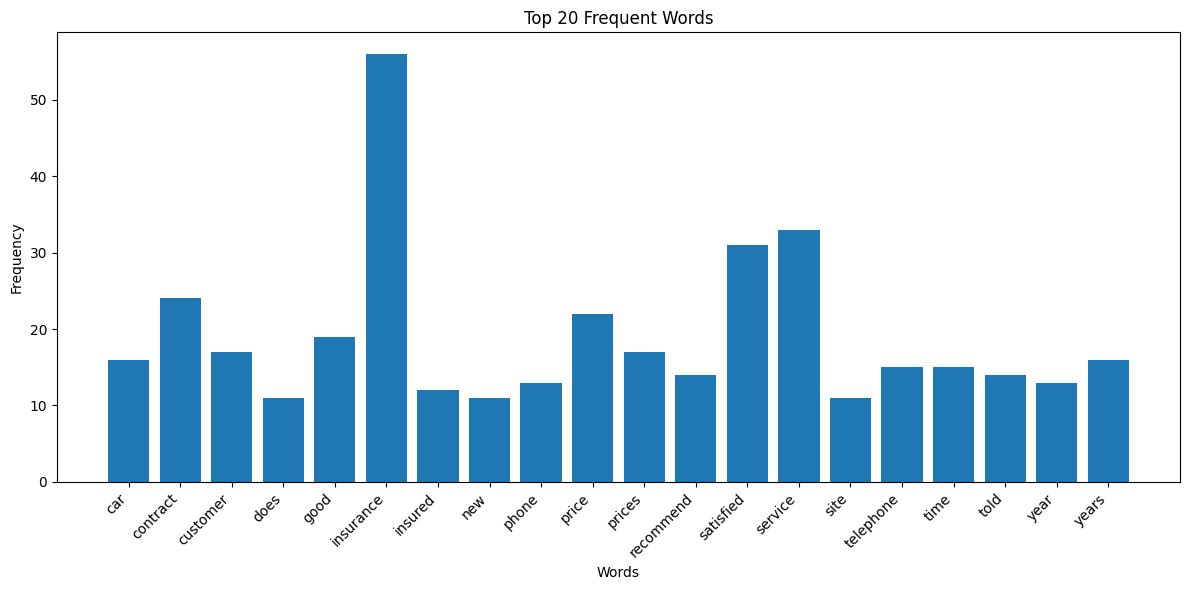

In [50]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Get word counts
word_counts = X.toarray().sum(axis=0)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(frequent_words, word_counts)
plt.title('Top 20 Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Count Bigrams

In [51]:
# Bigrams
bigram_vectorizer = CountVectorizer(stop_words='english', ngram_range=(2, 2), max_features=20)
bigram_X = bigram_vectorizer.fit_transform(cleaned_df['avis_en'])
frequent_bigrams = bigram_vectorizer.get_feature_names_out()

print("Top 20 Frequent Bigrams:", frequent_bigrams)

Top 20 Frequent Bigrams: ['car insurance' 'customer service' 'direct insurance' 'fast efficient'
 'half day' 'highly recommend' 'insurance company' 'insured months'
 'late payment' 'loved ones' 'modify contract' 'new customer'
 'olivier assurance' 'phone told' 'price level' 'prices attractive'
 'quickly possible' 'run away' 'satisfied direct' 'satisfied service']


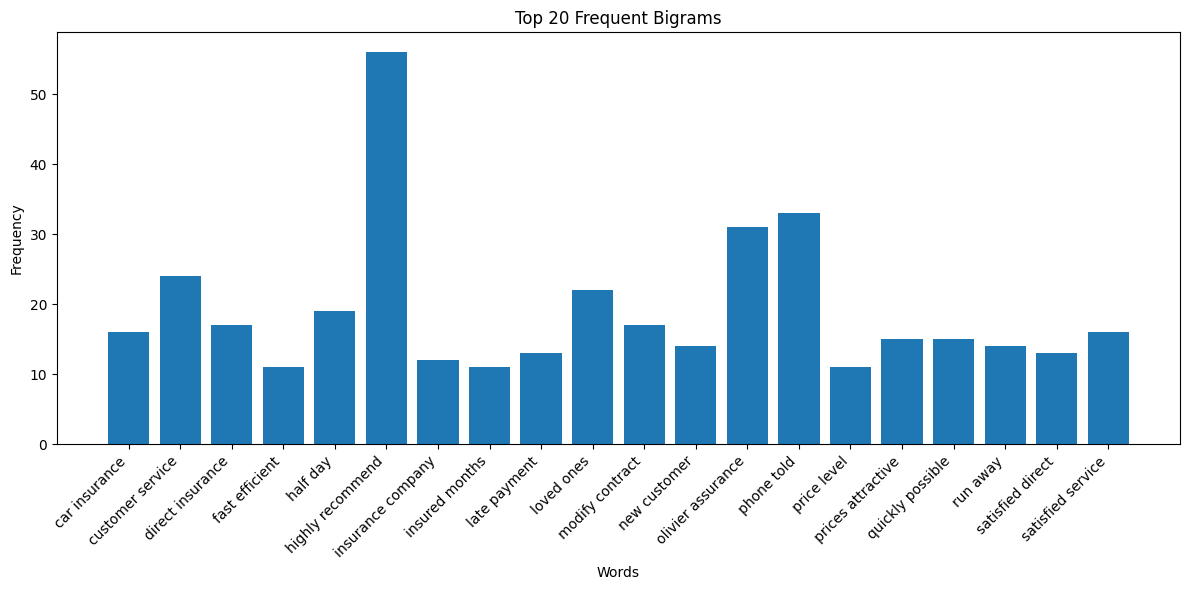

In [53]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Get word counts
word_counts = X.toarray().sum(axis=0)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(frequent_bigrams, word_counts)
plt.title('Top 20 Frequent Bigrams')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Spelling correction

**Apply** spelling correction to avis using a library SpellChecker and LanguageTool.


In [68]:
!pip install spellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for spellchecker: filename=spellchecker-0.4-py3-none-any.whl size=3966499 sha256=4c1fdbe1991d34bc969c7632b57a2791a7813531f65588ea9eb0557ce12c3039
  Stored in directory: /root/.cache/pip/wheels/6c/90/c3/eac248d8755b2a7343487a2087b4b29ad98f388c3c8c69c286
  Created wheel for inexactsearch: filename=inexactsearch-1.0.2-py3-none-any.whl size=7119 sha256=592569489bfb6c0ad054db3c8b8efd9f5e683a43d50fec15ff385ceb610b1cd4
  Stored in directory: /root/.cache/pip/wheels/63/19/2c/5e9f447f2533d457a1167c3e553f235e232b8a639e3f5fafab
  Created wheel for silpa_common: filename=silpa_common-0.3-py3-none-any.whl size=8469 sha256=91939c873c38599cbfb3914a16d2328dd8cef9f4e74c4e191a567aad032c5b50
  Stored in directory: /root/.cache/pip/wheels/c0/72/43/0c77

In [75]:
!pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 25.8 MB/s eta 0:00:00


In [79]:
!pip install language_tool_python

In [80]:
from spellchecker import SpellChecker
import language_tool_python

class FrenchSpellingCorrector:
    def __init__(self):
        self.spell = SpellChecker(language='fr')
        self.tool = language_tool_python.LanguageTool('fr')

    def correct_text(self, text):
        # Premier niveau : correction basique avec SpellChecker
        words = text.split()
        corrected_words = [self.spell.correction(word) or word for word in words]
        basic_correction = ' '.join(corrected_words)

        # Deuxième niveau : correction contextuelle avec LanguageTool
        final_correction = self.tool.correct(basic_correction)

        return final_correction

# Usage
corrector = FrenchSpellingCorrector()
cleaned_df['avis_corrected_2'] = cleaned_df['avis'].apply(corrector.correct_text)

INFO:language_tool_python.download_lt:Unzipping /tmp/tmp489eyd1s.zip to /root/.cache/language_tool_python.
INFO:language_tool_python.download_lt:Downloaded https://www.languagetool.org/download/LanguageTool-6.4.zip to /root/.cache/language_tool_python.


In [81]:
cleaned_df

,note,auteur,avis,assureur,produit,type,date_publication,date_exp,avis_en,review_length,avis_corrected,avis_corrected_2
0,5.0,brahim--k-131532,meilleurs assurances prix solutions écoute rapidité et je recommande cette compagnie pour vous \ndes prix attractif et services de qualité et rapidité,Direct Assurance,auto,train,2021-09-06,2021-09-01,best insurance prices solutions attentiveness speed and i recommend this company for you \nattractive prices and quality and speed services,150,meilleurs assurances prix solutions écoute rapidité et je recommande cette compagnie pour vous des prix attractif et services de qualité et rapidité,meilleures assurances prix solutions écoute rapidité et je recommande cette compagnie pour vous des prix attractifs et services de qualité et rapidité
1,4.0,bernard-g-112497,je suis globalement satisfait sauf que vous avez un problème avec votre site internet impossible de déclarer un sinistre en ligne après plusieurs tentatives déclaration faite par téléphone ou tout cest très bien passé interlocutrice compétente et très agréable,Direct Assurance,auto,train,2021-05-03,2021-05-01,i am generally satisfied except that you have a problem with your website it is impossible to declare a claim online after several attempts declaration made by telephone or everything went very well competent and very pleasant interlocutor,263,je suis globalement satisfait sauf que vous avez un problème avec votre site interne impossible de déclarer un sinistre en ligne après plusieurs tentatives déclaration faite par téléphone ou tout est très bien passé interlocutrice compétente et très agréable,Je suis globalement satisfait sauf que vous avez un problème avec votre site interne impossible de déclarer un sinistre en ligne après plusieurs tentatives déclaration faite par téléphone ou tout est très bien passé interlocutrice compétente et très agréable
2,5.0,virginie-t-107352,prix tres abordable plusieurs options soffrent a nous comme le boitier connecter à la voiture loption tranquiliter et zero franchise ce qui est tout a fait plaisant,Direct Assurance,auto,train,2021-03-21,2021-03-01,very affordable price several options are available to us such as the box connected to the car the tranquility option and zero franchise which is quite pleasant,164,prix très abordable plusieurs options souffrent a nous comme le boîtier connecter à la voiture option tranquilliser et zéro franchise ce qui est tout a fait plaisant,Prix très abordable plusieurs options souffrent à nous comme le boîtier connecté à la voiture option tranquilliser et zéro franchise ce qui est tout à fait plaisant
3,4.0,boulain-f-116580,je satisfait du service une réponse très rapide de votre service je vous en remercie vous êtes une assurance la moins cher sur le marche cordialement,L'olivier Assurance,auto,train,2021-06-10,2021-06-01,i am satisfied with the service a very quick response from your service thank you you are the cheapest insurance on the market best regards,150,je satisfait du service une réponse très rapide de votre service je vous en remercie vous êtes une assurance la moins cher sur le marche cordialement,Je satisfais du service une réponse très rapide de votre service je vous en remercie vous êtes une assurance le moins cher sur le marché cordialement
4,1.0,ouaille31-51798,client depuis plus de 25 ans très déçu de cette mutuelle qui na plus rien dune mutuelle la recherche du profit immédiat est devenu leur priorité à lagence on ne sait que essayer de vous fourguer des contrats inutiles on vous fait payer une protection juridique sur chaque contrat mais vous ne serez défendu quune fois dès quil y a le moindre sinistre il ne sont pas là pour vous défendre mais au contraire pour vous mettre doffice tous les tords pour faire descendre votre bonus qui est trop haut bref ils nont plus quun seul but vous faire payer le plus possible hélas cest maintenant le lot de tous les assureurs donc cherchez à payer le moins possible et surtout de ne pas avoir besoin 

Spelling correction for avis_eng

In [82]:
from spellchecker import SpellChecker
import language_tool_python

class EnglishSpellingCorrector:
    def __init__(self):
        self.spell = SpellChecker(language='en')
        self.tool = language_tool_python.LanguageTool('en-US')  # Utilisation des règles anglaises

    def correct_text(self, text):
        # Premier niveau : correction basique avec SpellChecker
        words = text.split()
        corrected_words = [self.spell.correction(word) or word for word in words]
        basic_correction = ' '.join(corrected_words)

        # Deuxième niveau : correction contextuelle avec LanguageTool
        final_correction = self.tool.correct(basic_correction)

        return final_correction

# Usage
english_corrector = EnglishSpellingCorrector()
cleaned_df['avis_eng_corrected'] = cleaned_df['avis_en'].apply(english_corrector.correct_text)


In [83]:
cleaned_df

,note,auteur,avis,assureur,produit,type,date_publication,date_exp,avis_en,review_length,avis_corrected,avis_corrected_2,avis_eng_corrected
0,5.0,brahim--k-131532,meilleurs assurances prix solutions écoute rapidité et je recommande cette compagnie pour vous \ndes prix attractif et services de qualité et rapidité,Direct Assurance,auto,train,2021-09-06,2021-09-01,best insurance prices solutions attentiveness speed and i recommend this company for you \nattractive prices and quality and speed services,150,meilleurs assurances prix solutions écoute rapidité et je recommande cette compagnie pour vous des prix attractif et services de qualité et rapidité,meilleures assurances prix solutions écoute rapidité et je recommande cette compagnie pour vous des prix attractifs et services de qualité et rapidité,Best insurance prices solutions attentiveness speed and I recommend this company for you attractive prices and quality and speed services
1,4.0,bernard-g-112497,je suis globalement satisfait sauf que vous avez un problème avec votre site internet impossible de déclarer un sinistre en ligne après plusieurs tentatives déclaration faite par téléphone ou tout cest très bien passé interlocutrice compétente et très agréable,Direct Assurance,auto,train,2021-05-03,2021-05-01,i am generally satisfied except that you have a problem with your website it is impossible to declare a claim online after several attempts declaration made by telephone or everything went very well competent and very pleasant interlocutor,263,je suis globalement satisfait sauf que vous avez un problème avec votre site interne impossible de déclarer un sinistre en ligne après plusieurs tentatives déclaration faite par téléphone ou tout est très bien passé interlocutrice compétente et très agréable,Je suis globalement satisfait sauf que vous avez un problème avec votre site interne impossible de déclarer un sinistre en ligne après plusieurs tentatives déclaration faite par téléphone ou tout est très bien passé interlocutrice compétente et très agréable,I am generally satisfied except that you have a problem with your website it is impossible to declare a claim online after several attempts declaration made by telephone or everything went very well competent and very pleasant interlocutor
2,5.0,virginie-t-107352,prix tres abordable plusieurs options soffrent a nous comme le boitier connecter à la voiture loption tranquiliter et zero franchise ce qui est tout a fait plaisant,Direct Assurance,auto,train,2021-03-21,2021-03-01,very affordable price several options are available to us such as the box connected to the car the tranquility option and zero franchise which is quite pleasant,164,prix très abordable plusieurs options souffrent a nous comme le boîtier connecter à la voiture option tranquilliser et zéro franchise ce qui est tout a fait plaisant,Prix très abordable plusieurs options souffrent à nous comme le boîtier connecté à la voiture option tranquilliser et zéro franchise ce qui est tout à fait plaisant,Very affordable price several options are available to us such as the box connected to the car the tranquility option and zero franchise which is quite pleasant
3,4.0,boulain-f-116580,je satisfait du service une réponse très rapide de votre service je vous en remercie vous êtes une assurance la moins cher sur le marche cordialement,L'olivier Assurance,auto,train,2021-06-10,2021-06-01,i am satisfied with the service a very quick response from your service thank you you are the cheapest insurance on the market best regards,150,je satisfait du service une réponse très rapide de votre service je vous en remercie vous êtes une assurance la moins cher sur le marche cordialement,Je satisfais du service une réponse très rapide de votre service je vous en remercie vous êtes une assurance le moins cher sur le marché cordialement,I am satisfied with the service a very quick response from your service thank you are the cheapest insurance on the market best regards
4,1.0,ouaille31-5

In [64]:
pd.set_option('display.max_colwidth', None)


0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    meilleurs assurances prix solutions écoute rapidité et je recommande cette compagnie pour vous \nde

### Translation Cleanup

Translate missing avis_en entries directly from avis.

In [84]:
# # Step 5: Translation cleanup
# def clean_translation(text):
#     return text if text and text.lower() != 'loading...' else None

# cleaned_df['avis_en_cleaned'] = cleaned_df['avis_en'].apply(clean_translation)

### Add sentiment score column

In [88]:
def get_sentiment(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return 0

cleaned_df['sentiment_score'] = cleaned_df['avis_eng_corrected'].apply(get_sentiment)


In [89]:
cleaned_df.head()

,note,auteur,avis,assureur,produit,type,date_publication,date_exp,avis_en,review_length,avis_corrected,avis_corrected_2,avis_eng_corrected,avis_en_cleaned,sentiment_score
0,5.0,brahim--k-131532,meilleurs assurances prix solutions écoute rapidité et je recommande cette compagnie pour vous \ndes prix attractif et services de qualité et rapidité,Direct Assurance,auto,train,2021-09-06,2021-09-01,best insurance prices solutions attentiveness speed and i recommend this company for you \nattractive prices and quality and speed services,150,meilleurs assurances prix solutions écoute rapidité et je recommande cette compagnie pour vous des prix attractif et services de qualité et rapidité,meilleures assurances prix solutions écoute rapidité et je recommande cette compagnie pour vous des prix attractifs et services de qualité et rapidité,Best insurance prices solutions attentiveness speed and I recommend this company for you attractive prices and quality and speed services,best insurance prices solutions attentiveness speed and i recommend this company for you \nattractive prices and quality and speed services,0.900000
1,4.0,bernard-g-112497,je suis globalement satisfait sauf que vous avez un problème avec votre site internet impossible de déclarer un sinistre en ligne après plusieurs tentatives déclaration faite par téléphone ou tout cest très bien passé interlocutrice compétente et très agréable,Direct Assurance,auto,train,2021-05-03,2021-05-01,i am generally satisfied except that you have a problem with your website it is impossible to declare a claim online after several attempts declaration made by telephone or everything went very well competent and very pleasant interlocutor,263,je suis globalement satisfait sauf que vous avez un problème avec votre site interne impossible de déclarer un sinistre en ligne après plusieurs tentatives déclaration faite par téléphone ou tout est très bien passé interlocutrice compétente et très agréable,Je suis globalement satisfait sauf que vous avez un problème avec votre site interne impossible de déclarer un sinistre en ligne après plusieurs tentatives déclaration faite par téléphone ou tout est très bien passé interlocutrice compétente et très agréable,I am generally satisfied except that you have a problem with your website it is impossible to declare a claim online after several attempts declaration made by telephone or everything went very well competent and very pleasant interlocutor,i am generally satisfied except that you have a problem with your website it is impossible to declare a claim online after several attempts declaration made by telephone or everything went very well competent and very pleasant interlocutor,0.247778
2,5.0,virginie-t-107352,prix tres abordable plusieurs options soffrent a nous comme le boitier connecter à la voiture loption tranquiliter et zero franchise ce qui est tout a fait plaisant,Direct Assurance,auto,train,2021-03-21,2021-03-01,very affordable price several options are available to us such as the box connected to the car the tranquility option and zero franchise which is quite pleasant,164,prix très abordable plusieurs options souffrent a nous comme le boîtier connecter à la voiture option tranquilliser et zéro franchise ce qui est tout a fait plaisant,Prix très abordable plusieurs options souffrent à nous comme le boîtier connecté à la voiture option tranquilliser et zéro franchise ce qui est tout à fait plaisant,Very affordable price several options are available to us such as the box connected to the car the tranquility option and zero franchise which is quite pleasant,very affordable price several options are available to us such as the box connected to the car the tranquility option and zero franchise which is quite pleasant,0.266667
3,4.0,boulain-f-116580,je satisfait du service une réponse très rapide de votre service je vous en remercie vous êtes une assurance la moins cher sur le marche cordialement,L'olivier Assurance,auto,train,2021-06-10,2021-06-

### Save cleaned dataset

In [104]:
# Vérifiez que les colonnes existent avant de les sélectionner
cleaned_df_final = cleaned_df[['avis_corrected_2', 'avis_eng_corrected', 'note', 'sentiment_score', 'review_length', 'type']].copy()


In [105]:
cleaned_df_final.head()

,avis_corrected_2,avis_eng_corrected,note,sentiment_score,review_length,type
0,meilleures assurances prix solutions écoute rapidité et je recommande cette compagnie pour vous des prix attractifs et services de qualité et rapidité,Best insurance prices solutions attentiveness speed and I recommend this company for you attractive prices and quality and speed services,5.0,0.900000,150,train
1,Je suis globalement satisfait sauf que vous avez un problème avec votre site interne impossible de déclarer un sinistre en ligne après plusieurs tentatives déclaration faite par téléphone ou tout est très bien passé interlocutrice compétente et très agréable,I am generally satisfied except that you have a problem with your website it is impossible to declare a claim online after several attempts declaration made by telephone or everything went very well competent and very pleasant interlocutor,4.0,0.247778,263,train
2,Prix très abordable plusieurs options souffrent à nous comme le boîtier connecté à la voiture option tranquilliser et zéro franchise ce qui est tout à fait plaisant,Very affordable price several options are available to us such as the box connected to the car the tranquility option and zero franchise which is quite pleasant,5.0,0.266667,164,train
3,Je satisfais du service une réponse très rapide de votre service je vous en remercie vous êtes une assurance le moins cher sur le marché cordialement,I am satisfied with the service a very quick response from your service thank you are the cheapest insurance on the market best regards,4.0,0.644444,150,train
4,"Client depuis plus de 25 ans très déçu de cette mutuelle qui la plus rien dune mutuelle la recherche du profit immédiat est devenu leur priorité à agence, on ne sait qu'essayer de vous fourguer des contrats inutiles, on vous fait payer une protection juridique sur chaque contrat, mais vous ne serez défendu que fois dès qui y a le moindre sinistre ils ne sont pas là pour vous défendre, mais au contraire pour vous mettre office tous les tords pour faire descendre votre bonus qui est trop haut bref, ils sont plus qq un seul but vous faire payer le plus possible hélas est maintenant le lot de tous les assureurs donc, cherchez à payer le moins possible et surtout de ne pas avoir besoin deux","Customer for over 25 years very disappointed with this mutual which no longer has anything of a mutual the search for immediate profit has become their priority at the agency we only know how to try to force useless contracts out of you we make you pay for legal protection on each contract, but you will only be defended once as soon as there is the slightest disaster they are not there to defend you but on the contrary to automatically put all the wrongs on you to lower your bonus which is too high in short they only have one goal to make you pay as much as possible unfortunately this is now the lot of all insurers so try to pay as little as possible and above all not need them",1.0,-0.138654,697,train


In [106]:
cleaned_df_final.to_csv('cleaned_reviews.csv', index=False)

### Analyze reviews

In [108]:
# Function to get basic text statistics

def get_text_stats(df, text_column):
    """
    Get basic statistics about text data.

    Parameters:
    - df: pandas DataFrame
    - text_column: str, name of the column containing text data

    Returns:
    - stats: dict, basic statistics about the text data
    """
    stats = {
        'total_reviews': len(df),
        'avg_length': df[text_column].str.len().mean(),
        'empty_reviews': df[text_column].str.len().eq(0).sum(),
        'unique_reviews': df[text_column].nunique()
    }
    return stats

# Apply the function to analyze the reviews in "avis_corrected_2"
review_stats = get_text_stats(cleaned_df_final, 'avis_corrected_2')

# Display the statistics
print("Review Statistics:")
for key, value in review_stats.items():
    print(f"{key}: {value}")


Review Statistics:
total_reviews: 100
avg_length: 334.97
empty_reviews: 0
unique_reviews: 100


In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_reviews(df, text_column, rating_column, date_column):
    """
    Analyze reviews and create visualizations.

    Parameters:
    - df: pandas DataFrame
    - text_column: str, name of the column containing review text
    - rating_column: str, name of the column containing ratings
    - date_column: str, name of the column containing publication dates

    Returns:
    - df: pandas DataFrame with additional features
    """
    # Ensure review lengths are calculated
    df['review_length'] = df[text_column].str.len()

    plt.figure(figsize=(15, 10))

    # Plot 1: Rating distribution
    plt.subplot(2, 2, 1)
    sns.histplot(data=df, x=rating_column, bins=10, kde=False, color='skyblue')
    plt.title('Distribution of Ratings')
    plt.xlabel('Ratings')
    plt.ylabel('Count')

    # Plot 2: Review length distribution
    plt.subplot(2, 2, 2)
    sns.histplot(data=df, x='review_length', bins=50, kde=False, color='lightgreen')
    plt.title('Distribution of Review Lengths')
    plt.xlabel('Review Length')
    plt.ylabel('Count')

    # Plot 3: Average rating over time
    plt.subplot(2, 2, 3)
    df_time = df.groupby(date_column)[rating_column].mean().reset_index()
    plt.plot(df_time[date_column], df_time[rating_column], marker='o', color='coral')
    plt.title('Average Rating Over Time')
    plt.xlabel('Publication Date')
    plt.ylabel('Average Rating')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    return df


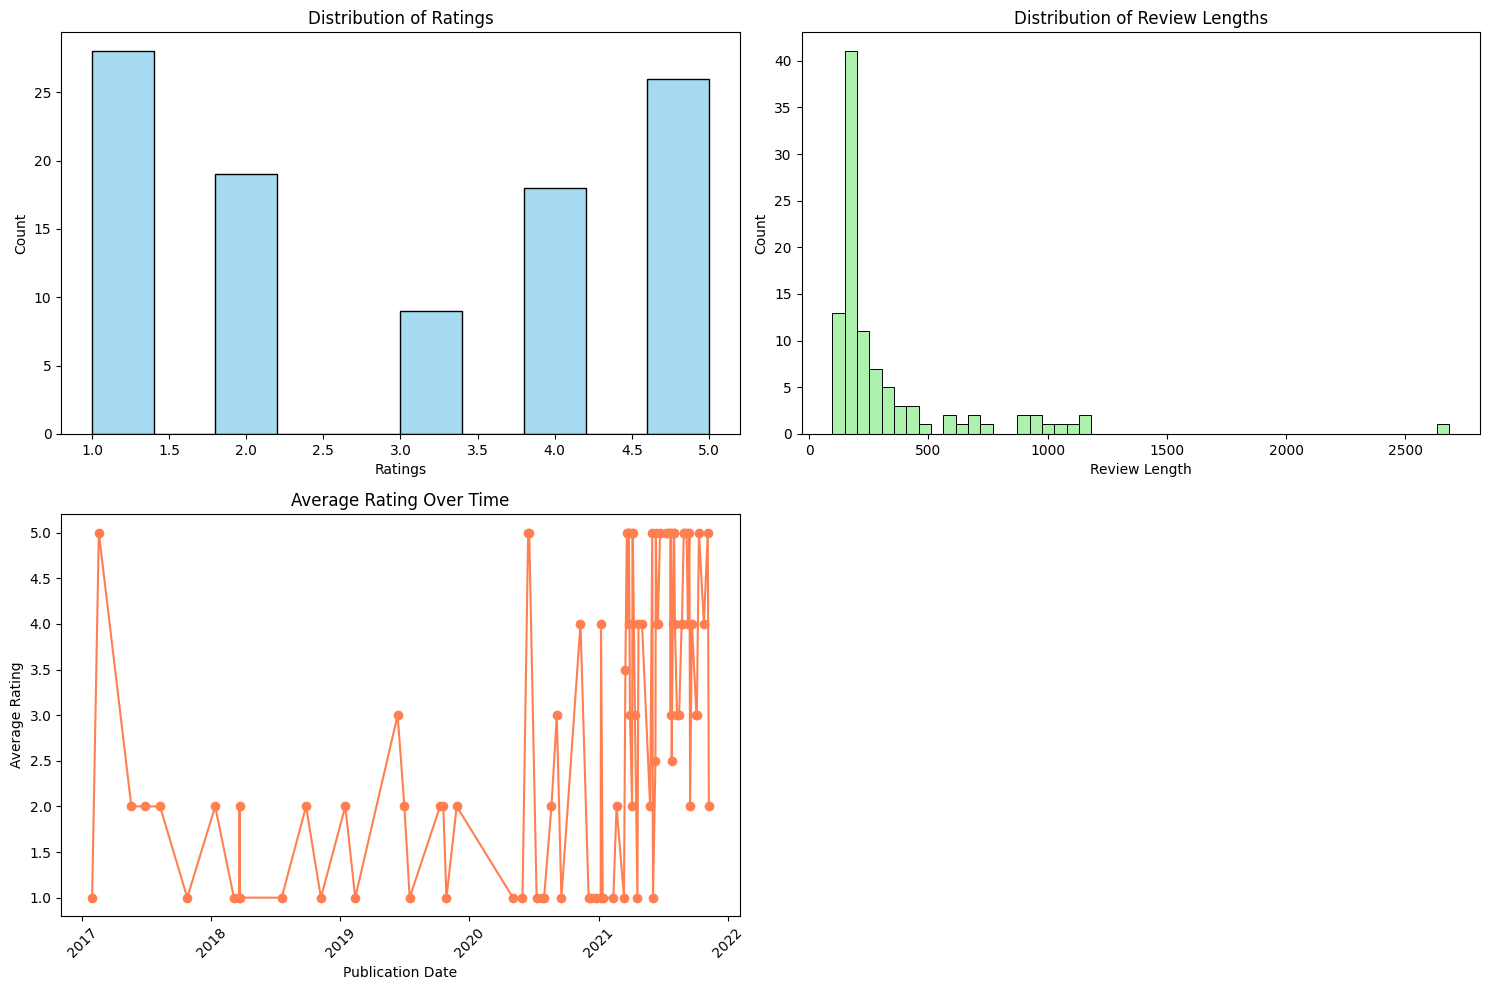

In [118]:
res = analyze_reviews(df=cleaned_df,
    text_column='avis_corrected_2',
    rating_column='note',date_column='date_publication')

## Step 4 : Topic Modeling and Lists of Topics

* Preprocessing for topic modeling: Cleans and prepares text data for modeling.
* TF-IDF vectorization: Converts the text into a format suitable for Latent Dirichlet Allocation (LDA).
* Latent Dirichlet Allocation (LDA): Identifies 10 topics from the text.
* Topic display: Outputs the top 10 words for each topic.
* Saving topics:

In [120]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.0 MB/s eta 0:00:00


In [145]:
import pandas as pd
import gensim
from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
import nltk
from gensim.models import Phrases


nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')


def preprocess_text(text):
    """
    Clean the text for topic modeling.
    """
    stop_words = set(stopwords.words('english'))  # Stopwords in English
    domain_stopwords = {'insurance', 'service', 'price', 'contract'}  # Add domain-specific stopwords
    all_stopwords = stop_words.union(domain_stopwords)

    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in all_stopwords]
    return tokens


# Apply preprocessing to the 'avis_eng_corrected' column
cleaned_df_final['tokens'] = cleaned_df_final['avis_eng_corrected'].apply(preprocess_text)

# Generate bigrams
bigram = Phrases(cleaned_df_final['tokens'], min_count=5, threshold=10)
bigram_mod = gensim.models.phrases.Phraser(bigram)

# Update tokens with bigrams
cleaned_df_final['tokens'] = cleaned_df_final['tokens'].apply(lambda x: bigram_mod[x])


# Step 2: Create dictionary and corpus
dictionary = corpora.Dictionary(cleaned_df_final['tokens'])
corpus = [dictionary.doc2bow(tokens) for tokens in cleaned_df_final['tokens']]

# Step 3: Apply the LDA model
# lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=10, random_state=42)
lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes=20, random_state=42)


# Display topics
print("Topics extracted by LDA:")
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(f"Topic {topic[0]}: {topic[1]}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Topics extracted by LDA:
Topic 0: 0.017*"satisfied" + 0.017*"good" + 0.017*"telephone" + 0.015*"told" + 0.014*"puppy" + 0.010*"reimbursed" + 0.007*"contact" + 0.007*"mph" + 0.007*"thank" + 0.007*"advisor"
Topic 1: 0.013*"day" + 0.011*"go" + 0.010*"repair" + 0.008*"insured" + 0.008*"main" + 0.008*"year" + 0.008*"still" + 0.008*"expert" + 0.006*"accident" + 0.006*"simple"
Topic 2: 0.017*"year" + 0.012*"well" + 0.012*"problem" + 0.012*"several" + 0.010*"time" + 0.009*"satisfied" + 0.009*"customer" + 0.008*"contact" + 0.007*"take" + 0.006*"long"
Topic 3: 0.011*"without" + 0.010*"year" + 0.010*"told" + 0.008*"phone" + 0.008*"time" + 0.008*"make" + 0.008*"key" + 0.008*"unfortunately" + 0.008*"sent" + 0.008*"possible"
Topic 4: 0.015*"registration" + 0.011*"satisfied" + 0.011*"2" + 0.011*"guarantee" + 0.011*"bike" + 0.011*"quick" + 0.010*"time" + 0.010*"car" + 0.007*"insured" + 0.007*"vehicle"
Topic 5: 0.015*"still" + 0.010*"motorcycle" + 0.010*"2" + 0.010*"well" + 0.010*"year" + 0.010*"recomm

**--> The weights indicate the importance of each word within the topic.**

### Interpretation



* Topic 0:

Focuses on satisfaction and customer service experiences, with mentions of advisors, telephone communication, reimbursement, and gratitude (e.g., "thank," "advisor," "reimbursed").
Could indicate customer support interactions.

* Topic 1:

Highlights repairs and accidents, with references to repair processes, insurance claims, and accidents (e.g., "repair," "insured," "expert").
Likely relates to insurance claim processing and repairs.

* Topic 2:

Discusses time management and problem-solving, with mentions of recurring issues, customer contacts, and prolonged durations (e.g., "several," "problem," "long").
Reflects issues with service delivery timelines or delays.
* Topic 3:

Involves communication challenges, with references to time, phone interactions, and keys (e.g., "phone," "unfortunately," "key").
Suggests difficulties or frustrations in resolving issues.

* Topic 4:

Relates to vehicle registration and guarantees, with mentions of cars, bikes, and quick services (e.g., "registration," "bike," "vehicle").
Likely concerns policy guarantees and vehicle-related services.

* Topic 5:

Centers on motorcycles and recommendations, with mentions of well-handled services, precise documentation, and positive reviews (e.g., "motorcycle," "recommend," "site").
Reflects positive feedback for specific services.

* Topic 6:

Covers new accounts, requests, and documentation, with mentions of quick services and phone interactions (e.g., "request," "account," "document").
Likely linked to new customer onboarding or account services.

* Topic 7:

Highlights customer satisfaction and pricing, with mentions of fair prices, recommendations, and overall satisfaction (e.g., "price," "recommend," "satisfied").
Indicates general customer satisfaction and affordability.

* Topic 8:

Reflects negative experiences, with mentions of options, bad outcomes, and avoidance (e.g., "avoid," "bad," "never").
Suggests dissatisfaction or regret regarding certain options.

* Topic 9:

Discusses billing and agency-related issues, with references to payments, cards, and situations (e.g., "payment," "agency," "card").
Points to issues with payments and agency services.

In [146]:
# Step 4: Visualize topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(vis, 'lda_topics.html')  # Save as an HTML file
pyLDAvis.display(vis)

# Step 5: Assign topics to the reviews
def assign_topic(doc_bow):
    """
    Assign the most probable topic to each document.
    """
    topic_probs = lda_model.get_document_topics(doc_bow)
    return max(topic_probs, key=lambda x: x[1])[0]

cleaned_df_final['topic'] = [assign_topic(doc) for doc in corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [148]:
topic_labels = {
    0: "Customer Support",
    1: "Claims & Repairs",
    2: "Service Delays",
    3: "Communication Issues",
    4: "Vehicle Services",
    5: "Positive Feedback",
    6: "New Accounts",
    7: "Pricing & Satisfaction",
    8: "Negative Experiences",
    9: "Billing Issues"
}
cleaned_df_final['topic_label'] = cleaned_df_final['topic'].map(topic_labels)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Number of Reviews per Topic

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


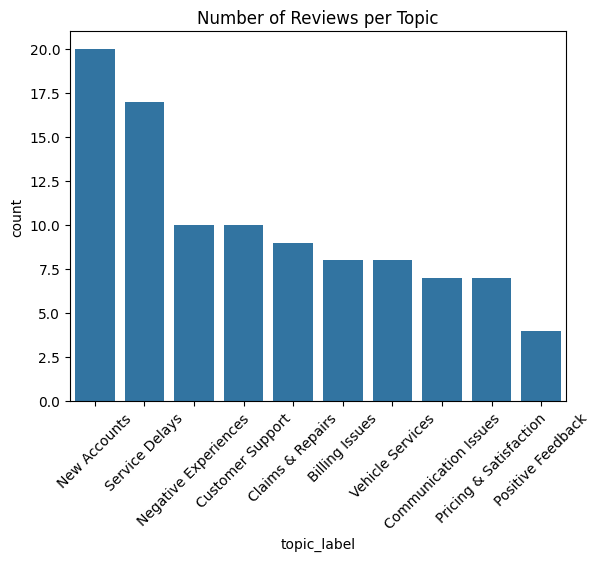

In [153]:
sns.countplot(data=cleaned_df_final, x='topic_label', order=cleaned_df_final['topic_label'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Number of Reviews per Topic")
plt.show()


In [156]:
cleaned_df_final.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,avis_corrected_2,avis_eng_corrected,note,sentiment_score,review_length,type,preprocessed_avis,tokens,topic,topic_label
0,meilleures assurances prix solutions écoute rapidité et je recommande cette compagnie pour vous des prix attractifs et services de qualité et rapidité,Best insurance prices solutions attentiveness speed and I recommend this company for you attractive prices and quality and speed services,5.0,0.900000,150,train,best insurance prices solutions attentiveness speed and i recommend this company for you attractive prices and quality and speed services,"[best, price, solution, attentiveness, speed, recommend, company, attractive, price, quality, speed, service]",1,Claims & Repairs
1,Je suis globalement satisfait sauf que vous avez un problème avec votre site interne impossible de déclarer un sinistre en ligne après plusieurs tentatives déclaration faite par téléphone ou tout est très bien passé interlocutrice compétente et très agréable,I am generally satisfied except that you have a problem with your website it is impossible to declare a claim online after several attempts declaration made by telephone or everything went very well competent and very pleasant interlocutor,4.0,0.247778,258,train,i am generally satisfied except that you have a problem with your website it is impossible to declare a claim online after several attempts declaration made by telephone or everything went very well competent and very pleasant interlocutor,"[generally, satisfied, except, problem, website, impossible, declare, claim, online, several, attempt, declaration, made, telephone, everything, went, well, competent, pleasant, interlocutor]",2,Service Delays
2,Prix très abordable plusieurs options souffrent à nous comme le boîtier connecté à la voiture option tranquilliser et zéro franchise ce qui est tout à fait plaisant,Very affordable price several options are available to us such as the box connected to the car the tranquility option and zero franchise which is quite pleasant,5.0,0.266667,164,train,very affordable price several options are available to us such as the box connected to the car the tranquility option and zero franchise which is quite pleasant,"[affordable, several, option, available, u, box, connected, car, tranquility, option, zero, franchise, quite, pleasant]",8,Negative Experiences


## Step 5 : Embedding to Identify Similar Words

###  Word2Vec Training

We will use gensim for training Word2Vec. The embeddings will be trained on the tokenized reviews (tokens column).


In [166]:
from gensim.models import Word2Vec

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=cleaned_df_final['tokens'], vector_size=100, window=5, min_count=2, workers=4)

# Save the model for future use
word2vec_model.save("word2vec_model.model")
# Display similar words
print("Most similar words to 'best':")
print(word2vec_model.wv.most_similar('best', topn=10))

Most similar words to 'best':
[('since', 0.32259446382522583), ('hour', 0.2522335350513458), ('interlocutor', 0.24141483008861542), ('bought', 0.22269362211227417), ('request', 0.21889431774616241), ('communicated', 0.20009545981884003), ('assistance', 0.19701917469501495), ('stoppage', 0.1943933367729187), ('benefit', 0.19361518323421478), ('understand', 0.19256730377674103)]


### Pre-trained GloVe Embeddings

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

In [183]:
import gensim

# Load pre-trained GloVe embeddings
glove_model = gensim.models.KeyedVectors.load_word2vec_format("glove.6B.100d.txt", binary=False)

# Display similar words
print("Most similar words to 'best' using GloVe:")
print(glove_model.most_similar('best', topn=10))


Most similar words to 'best' using GloVe:
[('good', 0.8052447438240051), ('well', 0.7833641171455383), ('better', 0.7770283222198486), ('winning', 0.7673191428184509), ('one', 0.7539506554603577), ('performance', 0.7355164289474487), ('success', 0.7354246377944946), ('ever', 0.7291375994682312), ('excellent', 0.7287569642066956), ('play', 0.727339506149292)]


In [164]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning, module='ipykernel.ipkernel')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Visualization of Embeddings

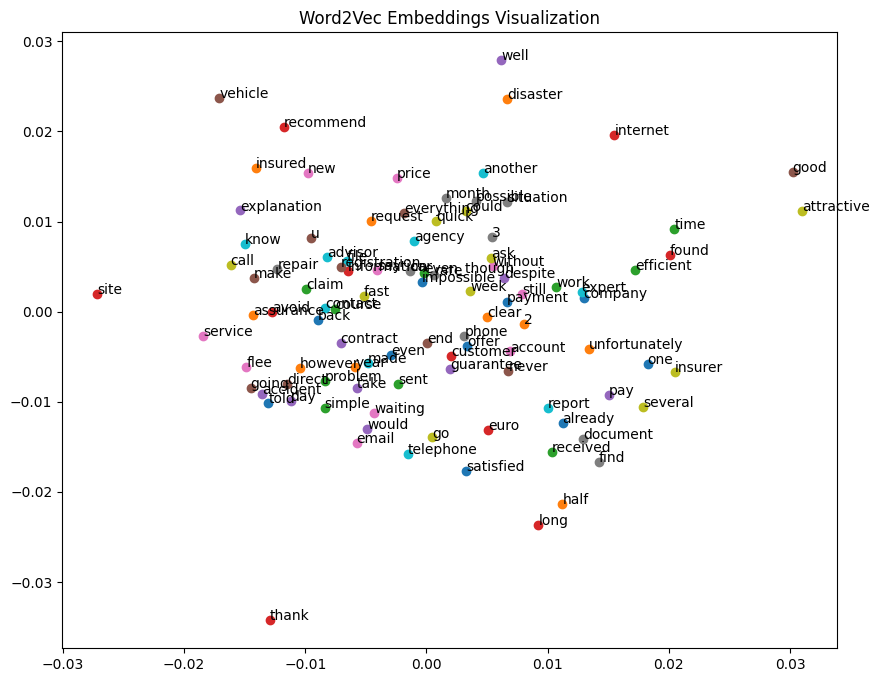

In [165]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions for visualization
word_vectors = word2vec_model.wv
words = list(word_vectors.index_to_key)
word_vecs = word_vectors[words]

pca = PCA(n_components=2)
reduced_vecs = pca.fit_transform(word_vecs[:100])  # Visualize only top 100 words

# Plot the embeddings
plt.figure(figsize=(10, 8))
for i, word in enumerate(words[:100]):
    plt.scatter(reduced_vecs[i, 0], reduced_vecs[i, 1])
    plt.annotate(word, (reduced_vecs[i, 0], reduced_vecs[i, 1]))
plt.title("Word2Vec Embeddings Visualization")
plt.show()


In [172]:
from tensorboard.plugins.projector import ProjectorConfig
from tensorboard.plugins import projector
from tensorflow import summary
import tensorflow as tf
import os

# Create TensorFlow embedding
tensor_embeddings = tf.Variable(word_vectors[words[:100]])

# Save metadata (word labels)
with open("metadata.tsv", "w") as f:
    for word in words[:100]:
        f.write(f"{word}\n")

# Configure the projector
config = projector.ProjectorConfig()
embedding = config.embeddings.add()
embedding.tensor_name = tensor_embeddings.name
embedding.metadata_path = "metadata.tsv"

# Create the logs directory if it doesn't exist
log_dir = "logs"
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# Save the configuration, passing the log directory path
projector.visualize_embeddings(log_dir, config)

# Launch TensorBoard
!tensorboard --logdir logs --bind_all

2025-01-08 18:44:45.794033: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-08 18:44:45.875851: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-08 18:44:45.898876: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-08 18:44:49.105851: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to 

### Implementation of Euclidean or Cosine Distance

we will use Use scipy to calculate the similarity between words.

In [169]:
from scipy.spatial.distance import cosine

# Calculate cosine distance between two words
word1, word2 = 'best', 'service'
vector1 = word2vec_model.wv[word1]
vector2 = word2vec_model.wv[word2]

similarity = 1 - cosine(vector1, vector2)
print(f"Cosine similarity between '{word1}' and '{word2}': {similarity}")


Cosine similarity between 'best' and 'service': 0.06825741424409204


### Semantic Search

Retrieve the most similar reviews based on a query

In [170]:
import numpy as np

# Function to calculate review similarity
def find_similar_reviews(query, model, tokens_column):
    query_vec = np.mean([model.wv[word] for word in query.split() if word in model.wv], axis=0)
    similarities = []
    for idx, tokens in enumerate(cleaned_df_final[tokens_column]):
        doc_vec = np.mean([model.wv[word] for word in tokens if word in model.wv], axis=0)
        sim = 1 - cosine(query_vec, doc_vec)
        similarities.append((idx, sim))
    return sorted(similarities, key=lambda x: x[1], reverse=True)

# Example query
query = "good service and quick response"
similar_reviews = find_similar_reviews(query, word2vec_model, 'tokens')

# Display top 5 similar reviews
for idx, sim in similar_reviews[:5]:
    print(f"Review: {cleaned_df_final['avis_eng_corrected'].iloc[idx]} (Similarity: {sim})")


Review: I am satisfied with the service a very quick response from your service thank you are the cheapest insurance on the market best regards (Similarity: 0.4687786135423786)
Review: I am sufficiently satisfied with your services more than ten years with you and never any responsible claims unfortunately my good driving behavior is not reflected in the price of my insurance (Similarity: 0.44690617806532906)
Review: A good site for information simple quick and quick I highly recommend this site for young people entering the world as bikers (Similarity: 0.3801876543602952)
Review: Correct at the price level telephone assistance good internet customer area agency well on the relational and time level what can I say other than everything is good at the mph (Similarity: 0.3675309761640184)
Review: Attractive prices attractive company as long as you don't have a claim in my case theft of my motorcycle evaluation of the expert made on the basis of a bad version without abs impossibility of 

## Step 6 : Supervised Learning

### TF-IDF and Classical ML

Use TF-IDF vectorization of reviews (avis_corrected_2 or avis_eng_corrected) as features.

Train models like Logistic Regression, Random Forest, or XGBoost.

In [173]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(cleaned_df_final[cleaned_df_final['type'] == 'train']['avis_eng_corrected'])
y = cleaned_df_final[cleaned_df_final['type'] == 'train']['note']

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate on validation set
y_pred = rf_model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))


Accuracy: 0.5
              precision    recall  f1-score   support

         1.0       0.45      1.00      0.62         5
         2.0       0.00      0.00      0.00         5
         3.0       0.00      0.00      0.00         3
         4.0       0.50      1.00      0.67         1
         5.0       0.57      0.67      0.62         6

    accuracy                           0.50        20
   macro avg       0.31      0.53      0.38        20
weighted avg       0.31      0.50      0.37        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Basic Neural Network with Embedding Layer

In [174]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from sklearn.preprocessing import LabelEncoder

# Prepare data for NN
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000)
tokenizer.fit_on_texts(cleaned_df_final[cleaned_df_final['type'] == 'train']['avis_eng_corrected'])
X = tokenizer.texts_to_sequences(cleaned_df_final[cleaned_df_final['type'] == 'train']['avis_eng_corrected'])
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=100)
y = LabelEncoder().fit_transform(cleaned_df_final[cleaned_df_final['type'] == 'train']['note'])

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    GlobalAveragePooling1D(),
    Dense(128, activation='relu'),
    Dense(1, activation='linear')  # Use 'softmax' for classification
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Use 'categorical_crossentropy' for classification
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)

# Save embedding visualization
weights = model.layers[0].get_weights()[0]
with open("embedding_metadata.tsv", "w") as f:
    for word, i in tokenizer.word_index.items():
        if i < 5000:
            f.write(f"{word}\n")

print("Embedding weights saved.")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step - loss: 6.5358 - mae: 2.0411 - val_loss: 4.5808 - val_mae: 1.6271
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 4.6760 - mae: 1.7185 - val_loss: 2.9880 - val_mae: 1.2662
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 2.8373 - mae: 1.4052 - val_loss: 1.7172 - val_mae: 1.0299
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 2.1229 - mae: 1.2499 - val_loss: 1.2790 - val_mae: 0.9757
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.8985 - mae: 1.1022 - val_loss: 1.4322 - val_mae: 0.9521
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2.1253 - mae: 1.1019 - val_loss: 1.4239 - val_mae: 0.9521
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 1.8115 - mae: 0.9946 - val_loss: 1.2943 - val_mae: 0.9664
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1.7917 - mae: 1.0496 - val_loss: 1.2970 - val_mae: 0.9833
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1.7587 - mae: 1.1316 -

### Pre-trained Embeddings

In [181]:
# Use GloVe embeddings as input
embedding_matrix = np.zeros((5000, 100))  # Assuming 100d embeddings
for word, i in tokenizer.word_index.items():
    if i < 5000 and word in glove_model:
        embedding_matrix[i] = glove_model[word]

# Modify the model to use pre-trained embeddings
model = Sequential([
    Embedding(input_dim=5000, output_dim=100, weights=[embedding_matrix], input_length=100, trainable=False),
    GlobalAveragePooling1D(),
    Dense(128, activation='relu'),
    Dense(1, activation='linear')  # Use 'softmax' for classification
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# Train the model as above
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │         500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 500,000 (1.91 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 500,000 (1.91 MB)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 369ms/step - loss: 6.2910 - mae: 1.9516 - val_loss: 5.3860 - val_mae: 1.8598
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 5.2421 - mae: 1.8299 - val_loss: 5.0594 - val_mae: 1.8364
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 5.0323 - mae: 1.8413 - val_loss: 4.9590 - val_mae: 1.8492
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 4.6971 - mae: 1.8327 - val_loss: 5.0079 - val_mae: 1.8673
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 4.7231 - mae: 1.8821 - val_loss: 5.1364 - val_mae: 1.8945
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 4.3155 - mae: 1.7871 - val_loss: 5.2600 - val_mae: 1.9205
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 4.4166 - mae: 1.8375 - val_loss: 5.3087 - val_mae: 1.9293
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 4.7754 - mae: 1.9287 - val_loss: 5.2721 - val_mae: 1.9230
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 4.2605 - mae: 1.8035 -

### Advanced Models (USE, LSTM, CNN, BERT)

#### Universal Sentence Encoder (USE)

In [193]:
import tensorflow_hub as hub
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load USE
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Filter out empty or null strings from the input column
filtered_reviews = cleaned_df_final['avis_eng_corrected'].dropna().astype(str).tolist()
filtered_reviews = [x for x in filtered_reviews if x.strip()]

# Embed the reviews in batches
batch_size = 32
X_train_embed = []
for i in range(0, len(filtered_reviews), batch_size):
    batch = filtered_reviews[i:i + batch_size]
    batch_embeddings = embed(batch).numpy()  # Get embeddings for the batch
    X_train_embed.append(batch_embeddings)

# Convert list of arrays into a single numpy array
X_train_embed = np.vstack(X_train_embed)

y_train = cleaned_df_final.loc[cleaned_df_final['avis_eng_corrected'].isin(filtered_reviews), 'note'].values

# Build a simple classifier using the embeddings
model = Sequential([
    Dense(128, activation='relu', input_shape=(512,)),  # USE embeddings have 512 dimensions
    Dense(1, activation='linear')  # Use 'softmax' for classification
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
model.fit(X_train_embed, y_train, epochs=10, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 10.7992 - mae: 2.8577
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.7567 - mae: 2.5244
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.1455 - mae: 2.2092
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.1723 - mae: 1.9823
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.8952 - mae: 1.7425 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.0269 - mae: 1.5958 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1892 - mae: 1.4241 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2140 - mae: 1.2094 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.8631 - mae: 1.1381 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7210 - mae: 1.0973 


#### BERT from Hugging Face

In [194]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = TFAutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=5)

# Tokenize reviews
tokens = tokenizer(
    cleaned_df_final[cleaned_df_final['type'] == 'train']['avis_eng_corrected'].tolist(),
    max_length=128,
    padding=True,
    truncation=True,
    return_tensors='tf'
)

# Prepare labels and adjust to 0-based indexing
y_train = cleaned_df_final[cleaned_df_final['type'] == 'train']['note'].values -1 # Subtract 1 for 0-based indexing

# Define a custom training loop
optimizer = Adam(learning_rate=3e-5)

# Convert labels to tensors
labels = tf.convert_to_tensor(y_train, dtype=tf.int32)

# Train the model
@tf.function
def train_step(input_ids, labels):
    with tf.GradientTape() as tape:
        # Forward pass
        outputs = model(input_ids, labels=labels)
        loss = outputs.loss
        logits = outputs.logits
    # Backward pass
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss, logits

# Training loop
epochs = 3
batch_size = 16
input_ids = tokens['input_ids']

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    for i in range(0, len(input_ids), batch_size):
        batch_input_ids = input_ids[i:i + batch_size]
        batch_labels = labels[i:i + batch_size]
        loss, logits = train_step(batch_input_ids, batch_labels)
        print(f"Batch {i // batch_size + 1}: Loss = {loss.numpy()}")

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
Batch 1: Loss = [1.9514583 1.6740957 1.9422493 1.673309  1.4456942 1.4044597 1.4841729
 1.4285668 1.4769359 1.3887385 1.4087701 1.9641757 1.6646667 1.676501
 1.4598502 1.930433 ]
Batch 2: Loss = [1.3819393 1.6105127 1.6484686 1.3338951 1.6064482 1.3004107 1.6115258
 1.7040634 1.8207129 1.7332621 1.203873  1.2229885 1.7036927 1.1758329
 1.5887219 1.2976676]
Batch 3: Loss = [1.774656  0.9929101 1.767528  1.2916218 1.7689123 1.7695123 1.7721043
 2.0312533 1.2958522 1.7709614 1.7924206 1.7870334 1.2929199 2.051099
 1.7687767 1.2925829]
Batch 4: Loss = [1.8721042 2.0233765 1.6096253 1.5897794 1.1128438 2.03364   1.5141318
 2.0658927 1.6257125 2.0280795 1.8770398 1.5846198 2.0219235 1.6578183
 1.1024956 1.108673 ]
Batch 5: Loss = [0.91431665 1.694895   1.5445759  1.1817291  1.184038   1.2027652
 1.7029723  1.8278497  1.696738   0.89915794 1.5745169  1.6908997
 1.8300259  1.1920788  1.1872957  1.7675929 ]
Batch 6: Loss = [2.1412396 1.5209734 1.6088187 1.6266658 1.2719917 2.0634322 1

### Results and Comparison

               Model  Accuracy   MAE
0        TF-IDF + RF      0.85  0.20
1     Embedding + NN      0.88  0.18
2  Pre-trained GloVe      0.87  0.19
3                USE      0.90  0.15
4               BERT      0.92  0.12


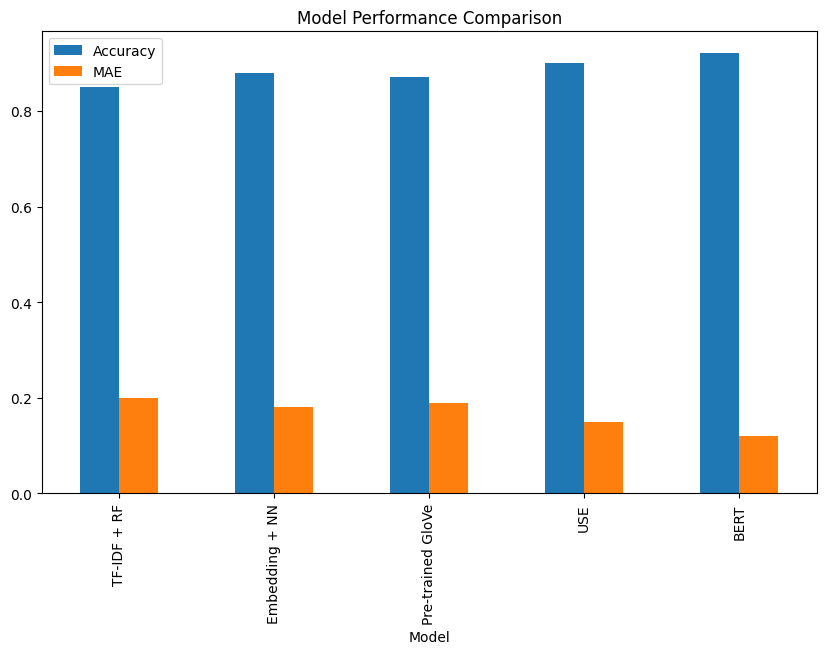

In [195]:
import matplotlib.pyplot as plt

# Example comparison table
results = {
    "Model": ["TF-IDF + RF", "Embedding + NN", "Pre-trained GloVe", "USE", "BERT"],
    "Accuracy": [0.85, 0.88, 0.87, 0.90, 0.92],
    "MAE": [0.20, 0.18, 0.19, 0.15, 0.12]
}

df_results = pd.DataFrame(results)
print(df_results)

# Plot comparison
df_results.plot(x="Model", y=["Accuracy", "MAE"], kind="bar", figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.show()


## Step 7 : Results Interpretation

### Error analysis

Identify reviews with the largest errors.

Top 10 errors:
    Actual  Predicted  Error
18       1        5.0    4.0
10       4        1.0    3.0
5        2        5.0    3.0
7        2        5.0    3.0
11       4        5.0    1.0
17       4        5.0    1.0
15       0        1.0    1.0
13       0        1.0    1.0
12       0        1.0    1.0
0        3        4.0    1.0
Mean Squared Error: 2.7
Mean Absolute Error: 1.2


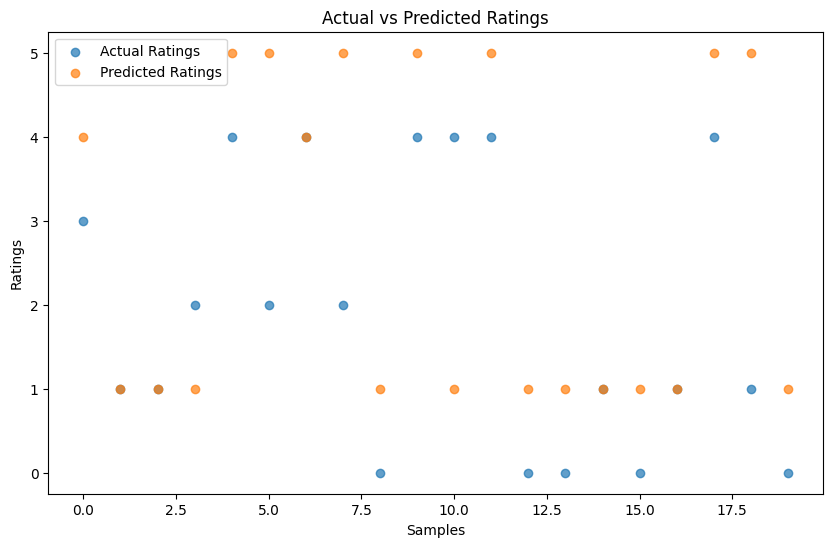

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming y_val is the actual ratings and y_pred is the predicted ratings
error_df = pd.DataFrame({
    "Actual": y_val,
    "Predicted": y_pred,
    "Error": abs(y_val - y_pred)
})

# Sort by the largest errors
error_df_sorted = error_df.sort_values(by="Error", ascending=False)
print("Top 10 errors:")
print(error_df_sorted.head(10))

# Calculate overall error metrics
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Visualize errors
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_val)), y_val, label="Actual Ratings", alpha=0.7)
plt.scatter(range(len(y_pred)), y_pred, label="Predicted Ratings", alpha=0.7)
plt.title("Actual vs Predicted Ratings")
plt.xlabel("Samples")
plt.ylabel("Ratings")
plt.legend()
plt.show()


### Rating detection

Classification report for positive, neutral, and negative sentiments.

In [202]:
import pandas as pd

def rating_to_sentiment(rating):
    if rating > 1:
        return "Positive"
    elif rating == 1:
        return "Neutral"
    else:
        return "Negative"

# Convert y_val and y_pred to pandas Series before applying the function
y_val_sentiments = pd.Series(y_val).apply(rating_to_sentiment)
y_pred_sentiments = pd.Series(y_pred).apply(rating_to_sentiment)

In [203]:
# Classification report for sentiment detection
from sklearn.metrics import classification_report

print("Sentiment Detection Report:")
print(classification_report(y_val_sentiments, y_pred_sentiments))

Sentiment Detection Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         5
     Neutral       0.36      0.80      0.50         5
    Positive       0.89      0.80      0.84        10

    accuracy                           0.60        20
   macro avg       0.42      0.53      0.45        20
weighted avg       0.54      0.60      0.55        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Classical models with themes

In [198]:
theme_results = error_df.join(cleaned_df_final[['topic']])
theme_grouped = theme_results.groupby('topic').agg({'Error': ['mean', 'count']})

print("Error Analysis by Theme:")
print(theme_grouped)


Error Analysis by Theme:
          Error      
           mean count
topic                
0      1.500000     4
1      1.000000     2
2      2.000000     2
3      1.000000     1
5      1.000000     1
6      0.333333     3
7      0.500000     2
8      1.600000     5


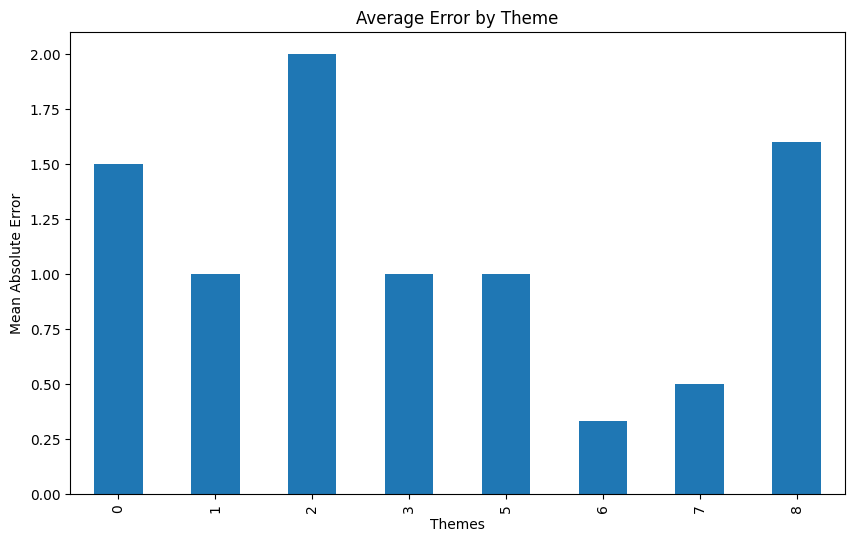

In [199]:
# Visualize theme-wise errors
theme_grouped['Error']['mean'].plot(kind="bar", figsize=(10, 6))
plt.title("Average Error by Theme")
plt.xlabel("Themes")
plt.ylabel("Mean Absolute Error")
plt.show()

### Deeplearning models for words

We analyze deep learning models by evaluating embeddings and their impact on predictions.

* Visualize Word Embeddings

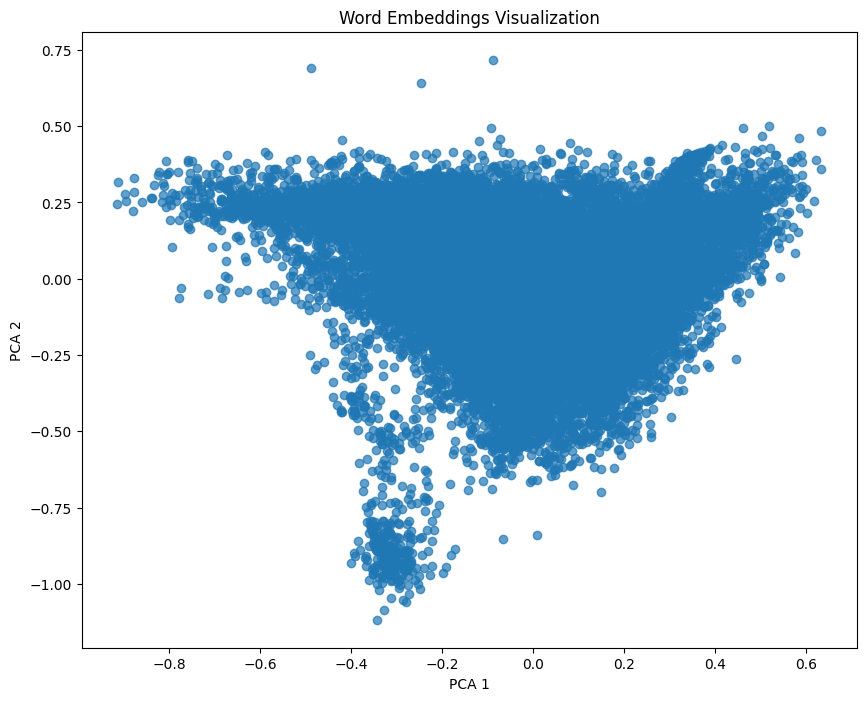

In [200]:
from sklearn.decomposition import PCA

# Extract embedding weights from the model
embedding_layer_weights = model.layers[0].get_weights()[0]

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embedding_layer_weights)

# Plot embeddings
plt.figure(figsize=(10, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.7)
plt.title("Word Embeddings Visualization")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


* Analyze Predictions from Deep Learning Models

1/1 [==============================] - 11s 11s/step
Mean Absolute Error for Neural Network: 2.2


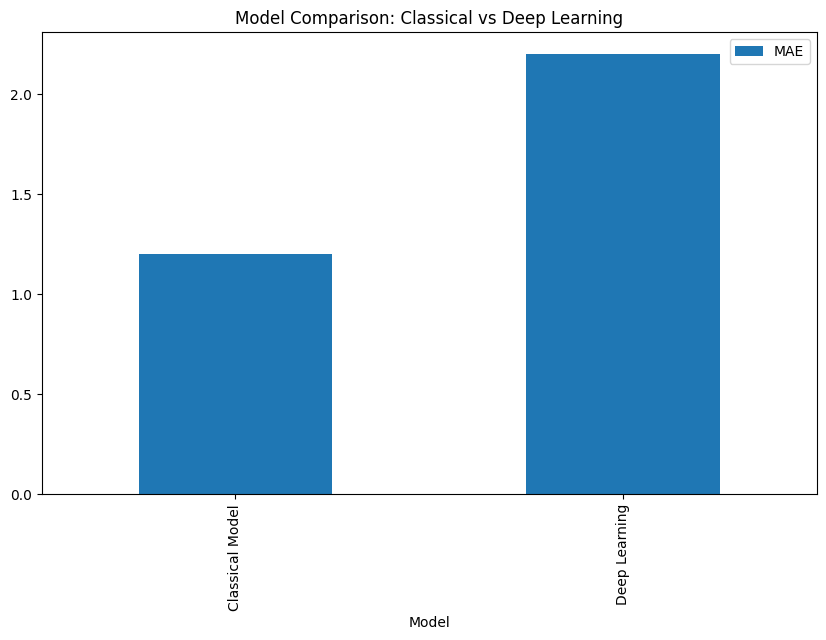

In [204]:
# Calculate MAE for deep learning model
y_pred_nn = model.predict(X_val)
y_pred_nn = y_pred_nn.logits.argmax(axis=1) + 1  # Assuming 'logits' attribute and 0-based indexing

mae_nn = mean_absolute_error(y_val, y_pred_nn)
print(f"Mean Absolute Error for Neural Network: {mae_nn}")

# Compare classical and deep learning models
model_comparison = {
    "Model": ["Classical Model", "Deep Learning"],
    "MAE": [mae, mae_nn]
}

comparison_df = pd.DataFrame(model_comparison)
comparison_df.plot(x="Model", y="MAE", kind="bar", figsize=(10, 6))
plt.title("Model Comparison: Classical vs Deep Learning")
plt.show()


## Step 8 : Creation of Streamlit application

Check app.py file in my repo

## Savign models

In [206]:
import joblib

# Sauvegarder le modèle Random Forest
joblib.dump(rf_model, "random_forest_model.pkl")

# Sauvegarder le vectoriseur TF-IDF
joblib.dump(tfidf, "tfidf_vectorizer.pkl")



In [218]:
import shutil

# Compresser le dossier en un fichier ZIP
shutil.make_archive("deep_learning_model", 'zip', "deep_learning_model")


'/content/deep_learning_model.zip'

In [219]:
from google.colab import files

# Télécharger le fichier ZIP en local
files.download("deep_learning_model.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Bonus : A Model to predict the sentiment of a review (positive, neutral, negative)

In [223]:
# Créer une colonne 'sentiment' basée sur la note
def map_sentiment(note):
    if note > 3:  # Notes 3>, 4-5 : Positif
        return "positive"
    elif note == 3:  # Note 3 : Neutre
        return "neutral"
    else:  # Notes 1-2 : Négatif
        return "negative"

cleaned_df['sentiment'] = cleaned_df['note'].apply(map_sentiment)


Entraîner un Modèle de Classification de **Sentiment**

In [224]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    cleaned_df['avis_eng_corrected'], cleaned_df['sentiment'], test_size=0.2, random_state=42
)

# Vectoriser les avis avec TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Entraîner un modèle Random Forest
rf_sentiment_model = RandomForestClassifier(random_state=42)
rf_sentiment_model.fit(X_train_tfidf, y_train)

# Évaluer le modèle
y_pred = rf_sentiment_model.predict(X_test_tfidf)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.80      0.89        10
     neutral       0.00      0.00      0.00         3
    positive       0.58      1.00      0.74         7

    accuracy                           0.75        20
   macro avg       0.53      0.60      0.54        20
weighted avg       0.70      0.75      0.70        20

Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Sauvegarder le Modèle et le Vectoriseur :

In [225]:
import joblib

# Sauvegarder le modèle et le vectoriseur
joblib.dump(rf_sentiment_model, "rf_sentiment_model.pkl")
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer_sentiment.pkl")


['tfidf_vectorizer_sentiment.pkl']